<a href="https://colab.research.google.com/github/SamanMansoor/Data-Science/blob/main/Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**


In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Load Dataset**

In [3]:
data = pd.read_csv("/content/gadget_sales_dataset.csv")
data.head()

,ProductID,Region,Price,AdvertisingBudget,CompetitorPrice,PromotionType,CustomerSatisfaction,ProductQuality,Season,DeliveryTime,Sales
0,1,East,256.879731,5885.903191,211.342954,Discount,1,5,Spring,4.210391,666.861177
1,2,West,241.131949,8496.042354,53.307890,Bundle,3,2,Fall,8.401548,597.335543
2,3,North,193.382238,2125.800189,87.361580,Bundle,6,1,Summer,6.530743,671.748741
3,4,East,289.011786,2168.046692,180.981060,Bundle,9,2,Winter,2.287948,598.619189
4,5,East,100.118629,6011.365243,125.151870,Bundle,1,2,Fall,6.736667,723.348903


# **Check the Data Type**

In [4]:
data.dtypes


ProductID                 int64
Region                   object
Price                   float64
AdvertisingBudget       float64
CompetitorPrice         float64
PromotionType            object
CustomerSatisfaction      int64
ProductQuality            int64
Season                   object
DeliveryTime            float64
Sales                   float64
dtype: object

# **Check the Shape**

In [5]:
data.shape

(5000, 11)

# **Descriptive Statistic**

In [6]:
data.describe()

,ProductID,Price,AdvertisingBudget,CompetitorPrice,CustomerSatisfaction,ProductQuality,DeliveryTime,Sales
count,5000.000000,4750.000000,4750.000000,5000.000000,5000.000000,5000.000000,5000.000000,4750.000000
mean,2500.500000,173.674306,5470.419007,150.274035,5.565800,3.038400,4.963874,590.316884
std,1443.520003,72.119233,2584.559115,57.868374,2.864771,1.413267,2.044853,111.126820
min,1.000000,50.002909,1000.475442,50.050491,1.000000,1.000000,-2.185494,172.678887
25%,1250.750000,111.224222,3266.419304,99.919775,3.000000,2.000000,3.615664,517.005883
50%,2500.500000,172.296393,5441.542960,150.875379,6.000000,3.000000,4.963573,589.193250
75%,3750.250000,236.076981,7716.015238,200.698551,8.000000,4.000000,6.342195,662.601522
max,5000.000000,299.889426,9997.058847,249.984965,10.000000,5.000000,12.618330,1029.327216


# **Check Duplicate Rows**

In [7]:
duplicate_rows_df = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 11)


In [8]:
#
data.count()

ProductID               5000
Region                  5000
Price                   4750
AdvertisingBudget       4750
CompetitorPrice         5000
PromotionType           5000
CustomerSatisfaction    5000
ProductQuality          5000
Season                  5000
DeliveryTime            5000
Sales                   4750
dtype: int64

In [9]:
# information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ProductID             5000 non-null   int64  
 1   Region                5000 non-null   object 
 2   Price                 4750 non-null   float64
 3   AdvertisingBudget     4750 non-null   float64
 4   CompetitorPrice       5000 non-null   float64
 5   PromotionType         5000 non-null   object 
 6   CustomerSatisfaction  5000 non-null   int64  
 7   ProductQuality        5000 non-null   int64  
 8   Season                5000 non-null   object 
 9   DeliveryTime          5000 non-null   float64
 10  Sales                 4750 non-null   float64
dtypes: float64(5), int64(3), object(3)
memory usage: 429.8+ KB


# **Check Missing values**

<Axes: >

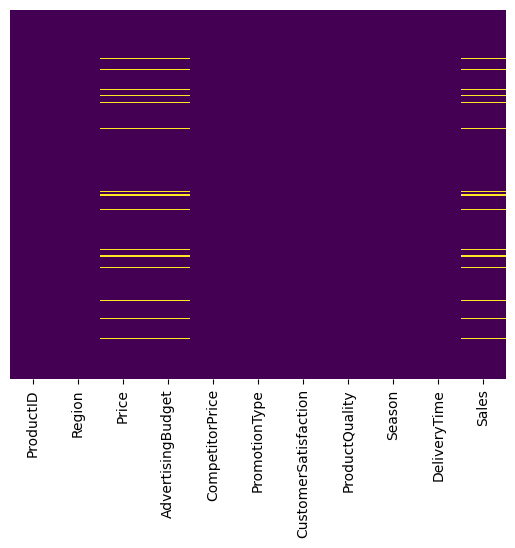

In [11]:
# Heatmap to check missing values
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [12]:
df = data.dropna()    # Dropping the missing values.
df.count()


ProductID               4750
Region                  4750
Price                   4750
AdvertisingBudget       4750
CompetitorPrice         4750
PromotionType           4750
CustomerSatisfaction    4750
ProductQuality          4750
Season                  4750
DeliveryTime            4750
Sales                   4750
dtype: int64

In [14]:
print(df.isnull().sum())

ProductID               0
Region                  0
Price                   0
AdvertisingBudget       0
CompetitorPrice         0
PromotionType           0
CustomerSatisfaction    0
ProductQuality          0
Season                  0
DeliveryTime            0
Sales                   0
dtype: int64


# **Data Visualization**

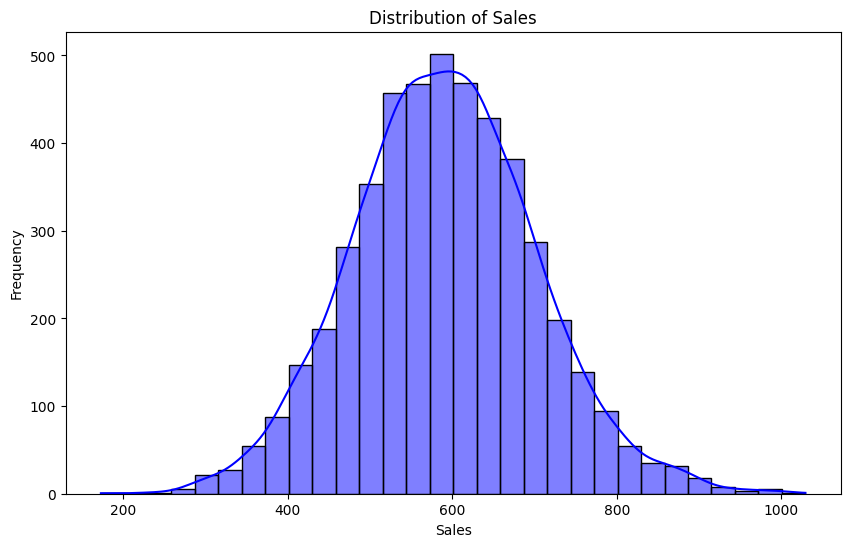

In [15]:
# Histogram of Sales
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'], bins=30, kde=True, color='blue')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

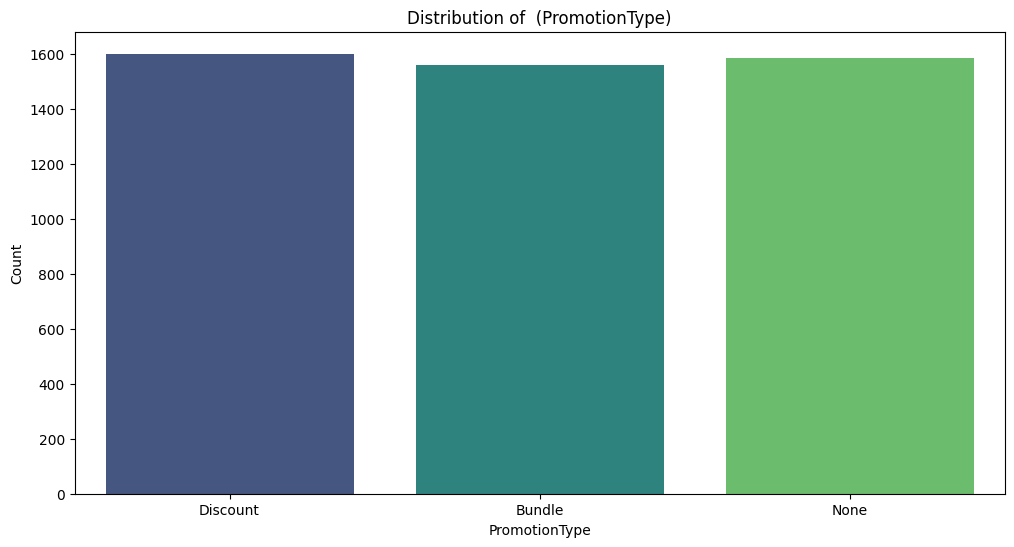

In [20]:
# Bar chart for PromotionType
plt.figure(figsize=(12, 6))
sns.countplot(x='PromotionType', data=df, palette='viridis')
plt.title('Distribution of  (PromotionType)')
plt.xlabel('PromotionType')
plt.ylabel('Count')
plt.show()

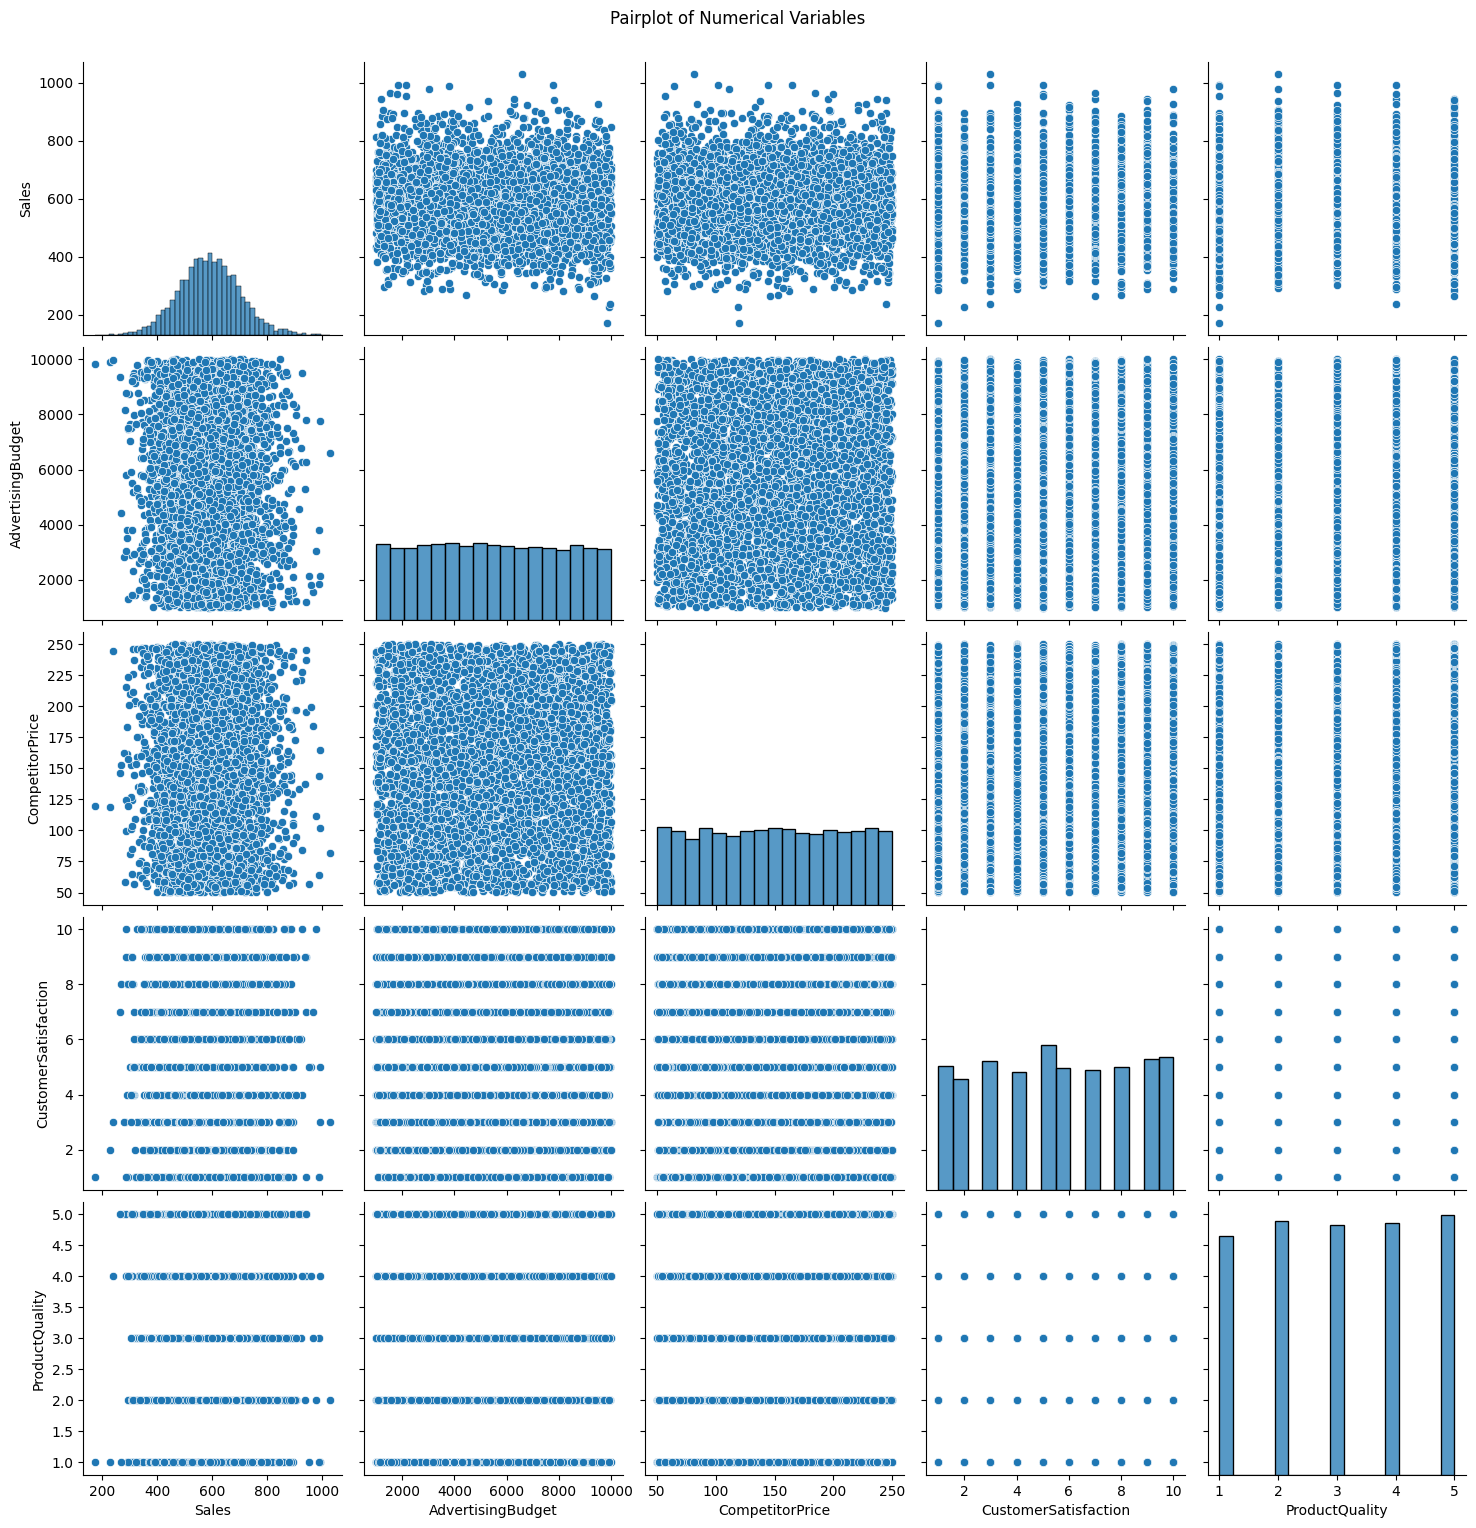

In [21]:
# Pairplot for numerical variables
sns.pairplot(df[['Sales', 'AdvertisingBudget', 'CompetitorPrice', 'CustomerSatisfaction', 'ProductQuality']], height=3)
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

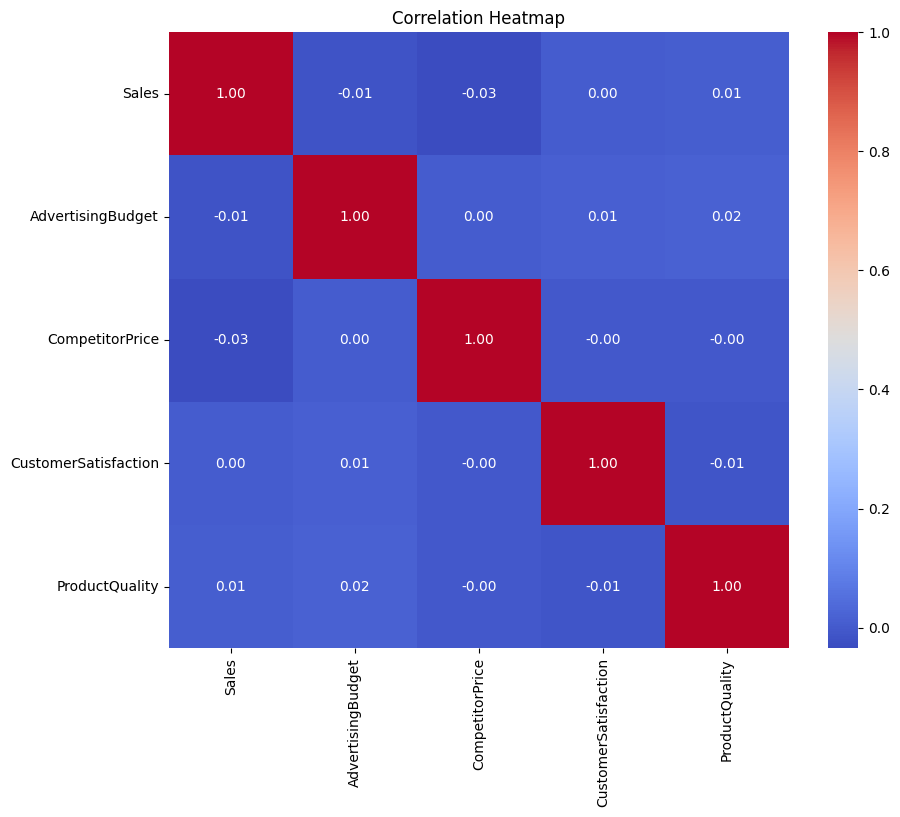

In [22]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df[['Sales', 'AdvertisingBudget', 'CompetitorPrice', 'CustomerSatisfaction', 'ProductQuality']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

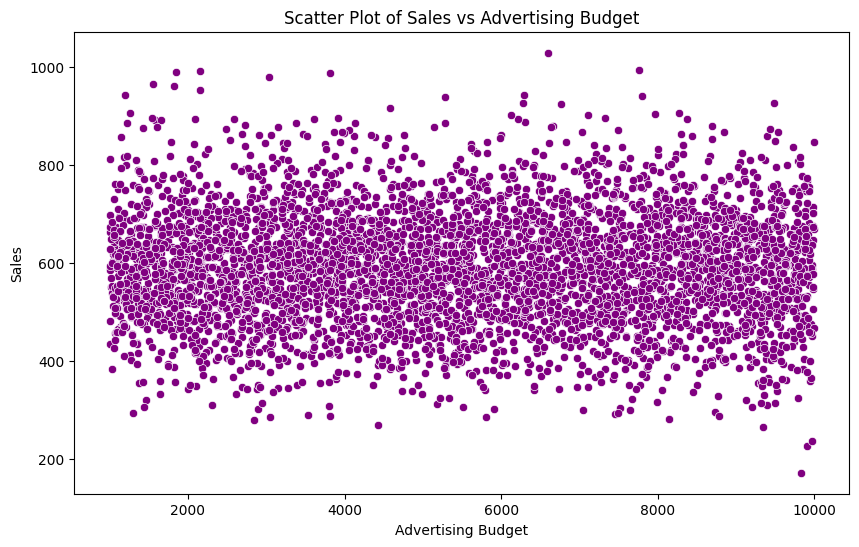

In [23]:
# Scatter plot between Sales and AdvertisingBudget
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AdvertisingBudget', y='Sales', data=df, color='purple')
plt.title('Scatter Plot of Sales vs Advertising Budget')
plt.xlabel('Advertising Budget')
plt.ylabel('Sales')
plt.show()


# **Predictive analysis**

Decision Tree Accuracy: 0.6505263157894737
Random Forest Accuracy: 0.7789473684210526
SVM Accuracy: 0.7978947368421052


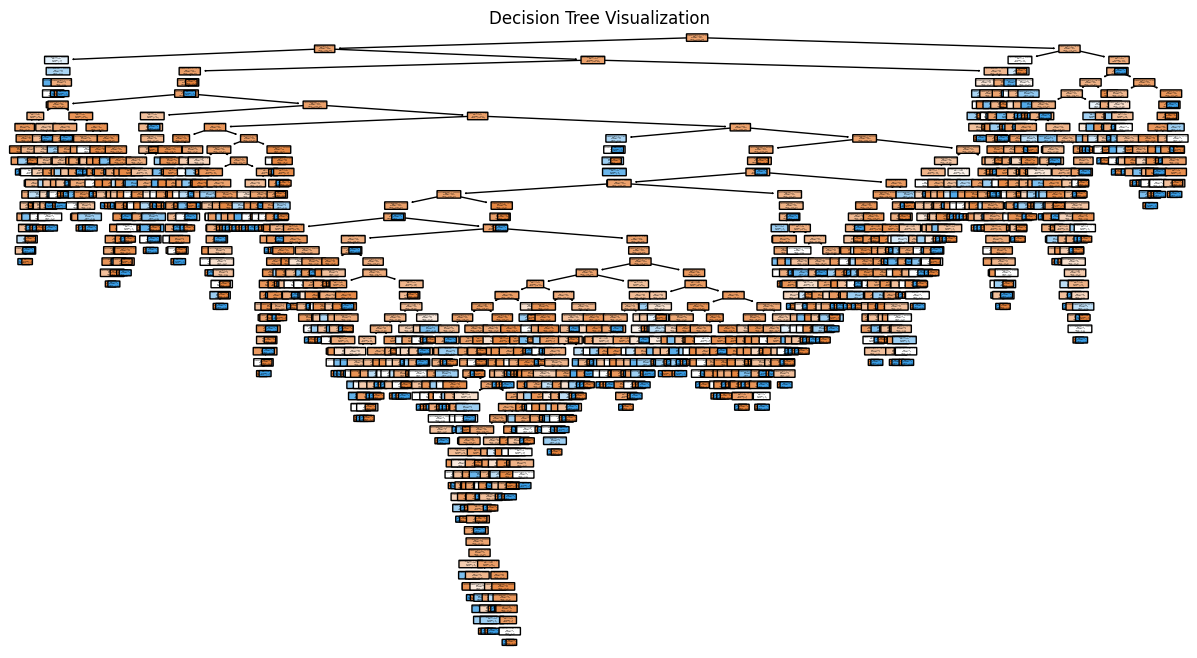

<Figure size 800x600 with 0 Axes>

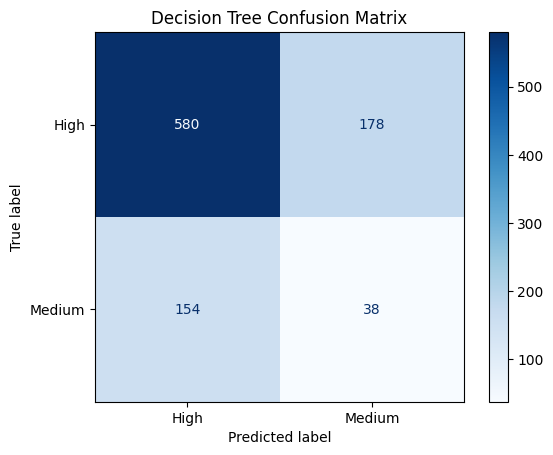

<Figure size 800x600 with 0 Axes>

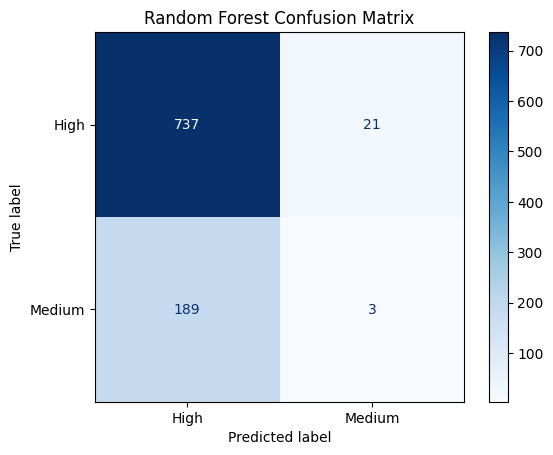

<Figure size 800x600 with 0 Axes>

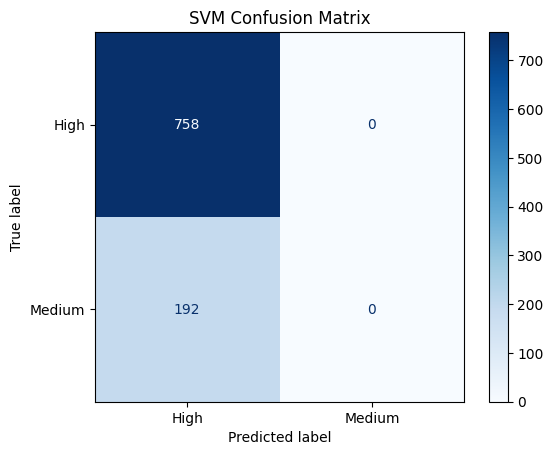

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


# Assuming 'SalesCategory' is now your target variable
df['SalesCategory'] = pd.cut(df['Sales'], bins=[-float('inf'), 100, 500, float('inf')], labels=['Low', 'Medium', 'High'])

# Features and target variable
X = df[['AdvertisingBudget', 'CompetitorPrice', 'CustomerSatisfaction', 'ProductQuality']]
y = df['SalesCategory']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print(f'Decision Tree Accuracy: {dt_accuracy}')

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f'Random Forest Accuracy: {rf_accuracy}')

# Support Vector Machine (SVM) Classifier
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print(f'SVM Accuracy: {svm_accuracy}')

# Visualize the Decision Tree
plt.figure(figsize=(15, 8))
plot_tree(dt_model, feature_names=X.columns, class_names=dt_model.classes_, filled=True, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()

# Plot Confusion Matrix for Decision Tree
dt_cm = confusion_matrix(y_test, dt_pred, labels=dt_model.classes_)
dt_disp = ConfusionMatrixDisplay(confusion_matrix=dt_cm, display_labels=dt_model.classes_)
plt.figure(figsize=(8, 6))
dt_disp.plot(cmap='Blues', values_format='d')
plt.title('Decision Tree Confusion Matrix')
plt.show()

# Plot Confusion Matrix for Random Forest
rf_cm = confusion_matrix(y_test, rf_pred, labels=rf_model.classes_)
rf_disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=rf_model.classes_)
plt.figure(figsize=(8, 6))
rf_disp.plot(cmap='Blues', values_format='d')
plt.title('Random Forest Confusion Matrix')
plt.show()

# Plot Confusion Matrix for SVM
svm_cm = confusion_matrix(y_test, svm_pred, labels=svm_model.classes_)
svm_disp = ConfusionMatrixDisplay(confusion_matrix=svm_cm, display_labels=svm_model.classes_)
plt.figure(figsize=(8, 6))
svm_disp.plot(cmap='Blues', values_format='d')
plt.title('SVM Confusion Matrix')
plt.show()
